# Regresión Lineal

La **regresión lineal** es un método estadístico que trata de modelar la **relación entre una variable continua y una o más variables independientes** mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como **variable dependiente o variable respuesta**, y a las variables independientes como **regresores, predictores o features**.

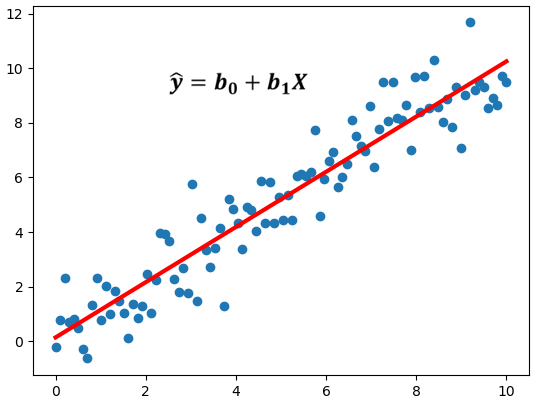

**y** sería la variable dependiente, **b_0** el termino aleatorio, **b_1** parametro del modelo(mide relación entre variable independiente y dependiente), **X** variable independiente

# Practica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


FIFA23 = pd.read_csv('./CLEAN_FIFA23_official_data.csv')
FIFA23.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number,Best Overall Rating,Year_Joined
0,0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,...,SUB,2018-07-01,None,2026.0,189.0,180.810,157000000.0,8.0,0.0,2018
1,1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,...,LCM,2020-01-30,None,2026.0,179.0,152.145,155000000.0,8.0,0.0,2020
2,2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,...,LB,2020-09-14,None,2024.0,172.0,152.145,97700000.0,19.0,0.0,2020
3,3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,...,RCM,2015-08-30,None,2025.0,181.0,154.350,198900000.0,17.0,0.0,2015
4,4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,...,RCM,2020-09-01,None,2026.0,172.0,149.940,154400000.0,23.0,0.0,2020


In [2]:
X = FIFA23['Height(cm.)']
y = FIFA23['Weight(lbs.)']

In [3]:
X.head()

0    189.0
1    179.0
2    172.0
3    181.0
4    172.0
Name: Height(cm.), dtype: float64

In [4]:
y.head()

0    180.810
1    152.145
2    152.145
3    154.350
4    149.940
Name: Weight(lbs.), dtype: float64

# Relación peso - altura

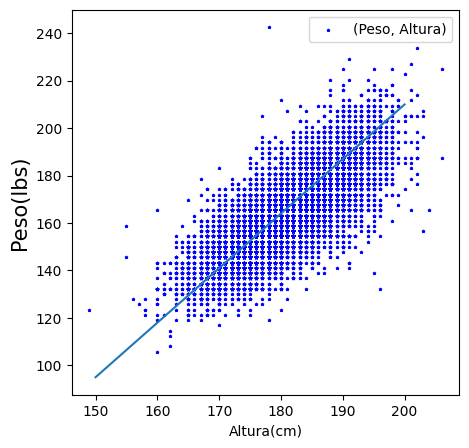

In [67]:
fig, ax = plt.subplots(figsize = (5,5))

x_space = np.linspace(150,200,100)
ax.plot(x_space,x_space*2.3-250)

ax.scatter(X, y, s=3,c='blue', marker='*', label = '(Peso, Altura)') # el marker es la forma del punto en la grafica
ax.set_xlabel('Altura(cm)')
ax.set_ylabel('Peso(lbs)', fontsize=15)
ax.legend()

plt.show()

Error de mi aproximación

In [258]:
 np.sum((y-(2.3*X-250))**2)/len(y)

121.435425464326

In [246]:
def gradient_descent(y,X,b_0,b_1,N,lr=0.00000001):
    prev_error = float('Inf')
    while True:
        y_pred = b_0 + X*b_1
        error = np.sum((y-y_pred)**2)/N
        db_0 = -(2/N)*(error)
        db_1 = -(2/N)*(np.sum(X*error))
        b_0 = b_0 - lr*db_0
        b_1 = b_1 - lr*db_1
        if prev_error - error <= 0.00001: break
        prev_error = error 
    print('Termino b:', b_0)
    print('Termino m:', b_1)
    print('Error', error)
    return b_0,b_1

In [247]:
b_0 = 0
b_1 = 0

b,m = gradient_descent(y,X,b_0,b_1,len(y))

Termino b: 2.8430971393131405e-07
Termino m: 0.908249557311269
Error 128.4105700236554


In [255]:
f = lambda x: m*x+b

Peso en libras de un jugador que mida 170cm

In [257]:
f(170)

154.40242502722546

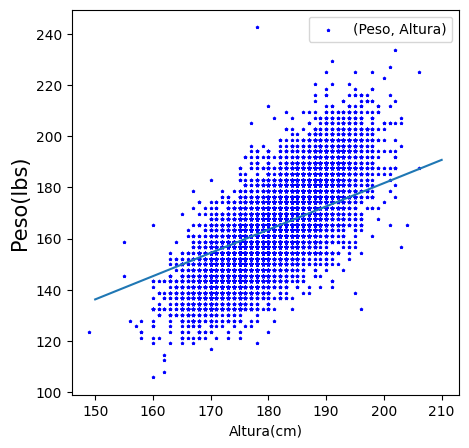

In [248]:
fig, ax = plt.subplots(figsize = (5,5))

x_space = np.linspace(150,210,100)
ax.plot(x_space,x_space*m+b)

ax.scatter(X, y, s=3,c='blue', marker='*', label = '(Peso, Altura)') # el marker es la forma del punto en la grafica
ax.set_xlabel('Altura(cm)')
ax.set_ylabel('Peso(lbs)', fontsize=15)
ax.legend()

plt.show()